# This notebook is part of Section 5.3

## Import the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Generate the dataset

In [2]:
X, y = make_blobs(n_samples=1000, centers=2,
                  random_state=0, cluster_std=0.60)

## Split the dataset

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

## Fit the model

In [4]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Test the model

In [5]:
accuracy_score(y_test, model.predict(X_test))

1.0

# Cancer Dataset

In [6]:
from sklearn.datasets import load_breast_cancer
cancer= load_breast_cancer()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


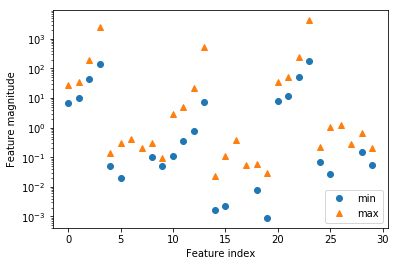

In [8]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")
plt.show()

In [9]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
X_test_scaled = (X_test - min_on_training) / range_on_training

In [10]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


In [11]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


# SVM for Regression

In [15]:
import  math
import os
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [17]:
os.chdir('D:')
os.getcwd()
cars_df=pd.read_excel('cars.xls')

In [18]:
y=cars_df.MPG
X=cars_df[['Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Year', 'Origin']]

In [19]:
X=pd.get_dummies(X,drop_first=True)

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
scaler=MinMaxScaler()

In [22]:
X_train_sc=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_sc=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [31]:
clf = svm.SVR()
clf.fit(X_train_sc, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [25]:
y_prediction = clf.predict(X_test_sc)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
print(RMSE)

3.6560625557615127


In [27]:
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
           {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.5,0.1,0.01,0.001,0.0001]},
           {'C':[1,10,100,1000],'kernel':['sigmoid'],'gamma':[0.5,0.1,0.01,0.001,0.0001]}]
grid_search=GridSearchCV(estimator=clf,param_grid=parameters,
                        cv=10,n_jobs=-1)

In [28]:
grid_search=grid_search.fit(X_train_sc,y_train)

In [30]:
y_prediction_gr=grid_search.predict(X_test_sc)
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction_gr))
print(RMSE)

2.627683452694091
